<a href="https://colab.research.google.com/github/vanlicht/MachineLearningJourney/blob/master/tensorflow_practice_specialization/course_02_cnn/week04/Exercise_8_Question_Thomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import zipfile
import os

In [2]:
local_zip = '/content/drive/My Drive/Tutorials_Learnings/Coursera-IntroToTensorflow/course_2_ConvolutionalNeuralNetworksInTensorFlow/week04/3258_5337_bundle_archive.zip'

zip_ref = zipfile.ZipFile(local_zip, mode='r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [3]:
def get_data(filename):
  images=[]
  labels=[]
  #with open('mycsv.csv', 'r') as csvfile:
  with open(filename, 'r') as csv_file:
    csvreader = csv.reader(csv_file)
    fields = next(csvreader) #here will also skip the headers, this is python 3
    # extracting field names through first row 
    for row in csvreader:
      labels.append(row[0])

      #get the 1D array back to 28 by 28, either use np.reshape or np.array_split
      #https://numpy.org/doc/stable/reference/generated/numpy.array_split.html
      image = np.array_split(np.array(row[1:]), 28, axis=0)

      #alternatively use np.reshape
      # image = np.array(row[1:]).astype(float).reshape(28, 28)
      images.append(image)
  
  images = np.array(images).astype(float)
  labels = np.array(labels).astype(int)

  return images, labels

train_file = '/tmp/sign_mnist_train/sign_mnist_train.csv'
test_file = '/tmp/sign_mnist_test/sign_mnist_test.csv'

training_images, training_labels = get_data(train_file)
testing_images, testing_labels = get_data(test_file)

# # Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
#fiture out how many unique labels by using set(training_labels)
#The American Sign Language letter database of hand gestures represent a multi-class problem 
#with 24 classes of letters (excluding J and Z which require motion).
len(set(testing_labels))

24

In [5]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=-1)
testing_images = np.expand_dims(testing_images, axis=-1)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    fill_mode='nearest', 
    horizontal_flip=True)

train_generator = train_datagen.flow(
    x = training_images, 
    y = training_labels, 
    batch_size=32)

validate_datagen = ImageDataGenerator(rescale=1.0/255)
validate_generator = validate_datagen.flow(
    x=testing_images, 
    y=testing_labels, 
    batch_size=32)

In [60]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)), 
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(rate=0.7),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=25, activation='softmax')])

In [61]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)             

In [62]:
# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
spe = int(len(training_images)/32)
vsteps = int(len(testing_images)/32)
print(spe)
print(vsteps)

857
224


In [64]:
history = model.fit(
    x=train_generator,
    epochs=20,
    verbose=1,
    validation_data = validate_generator,
    steps_per_epoch = spe,
    validation_steps = vsteps)

Epoch 1/20
857/857 [==============================] - 9s 11ms/step - loss: 2.8235 - accuracy: 0.1409 - val_loss: 2.0112 - val_accuracy: 0.3899
Epoch 2/20
857/857 [==============================] - 9s 10ms/step - loss: 2.3066 - accuracy: 0.2743 - val_loss: 1.7733 - val_accuracy: 0.3602
Epoch 3/20
857/857 [==============================] - 9s 10ms/step - loss: 2.0268 - accuracy: 0.3564 - val_loss: 1.2756 - val_accuracy: 0.5815
Epoch 4/20
857/857 [==============================] - 9s 10ms/step - loss: 1.8205 - accuracy: 0.4100 - val_loss: 1.1595 - val_accuracy: 0.6031
Epoch 5/20
857/857 [==============================] - 9s 10ms/step - loss: 1.6863 - accuracy: 0.4541 - val_loss: 0.9229 - val_accuracy: 0.6934
Epoch 6/20
857/857 [==============================] - 9s 10ms/step - loss: 1.5771 - accuracy: 0.4839 - val_loss: 0.9418 - val_accuracy: 0.6836
Epoch 7/20
857/857 [==============================] - 9s 10ms/step - loss: 1.4756 - accuracy: 0.5158 - val_loss: 0.8756 - val_accuracy: 0.6992

In [66]:
model.evaluate(x=testing_images, y=testing_labels, batch_size=32, verbose=0)

[142.1602783203125, 0.5600948333740234]

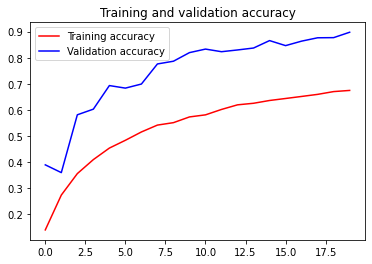

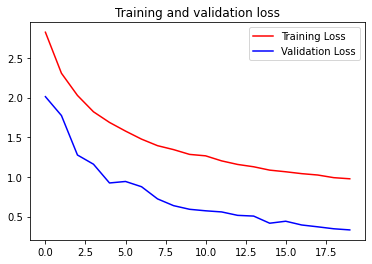

In [69]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()